# Procesamiento de Información 2023
## Unidad 7 - Tarea
## Detección de Emociones: Agresividad
### David Aarón Ramírez Olmeda

## Introducción

En este trabajo, hemos abordado el problema de clasificar la agresividad en comentarios de Twitter en idioma español. Nuestro objetivo ha sido desarrollar un modelo de aprendizaje automático que pueda detectar si un texto contiene agresividad o no. Para ello, se nos proporcionó un conjunto de datos de entrenamiento etiquetados manualmente, donde cada comentario tiene una clase asociada: "0" para comentarios no agresivos y "1" para comentarios agresivos.

Para abordar esta tarea, podemos aprovechar parte del trabajo realizado en la actividad anterior y hacer algunas modificaciones justo como hemos hecho anteriormente.

## Desarrollo

Realizamos el preprocesamiento de los textos, construimos vectores de características y entrenamos un clasificador SVM lineal utilizando los vectores de características y el conjunto de datos de entrenamiento.

In [1]:
import os

import re
import json
import unicodedata

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
# Preprocesamiento
stop_words = set(stopwords.words("spanish"))
stemmer = SnowballStemmer("spanish")

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)
    # Eliminar símbolos duplicados (2 consecutivos)
    text = re.sub(r'(\w)\1+', r'\1\1', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

In [3]:
# Lectura del archivo de entrenamiento
train_data = []
with open('AggressivenessDetection_train.json') as f:
    for line in f: 
        train_data.append(json.loads(line))
        
train_df = pd.DataFrame(train_data)

In [4]:
# Lectura archivo test
test_data = []
with open('AggressivenessDetection_predict.json') as f:
    for line in f:
        test_data.append(json.loads(line))
        
test_df = pd.DataFrame(test_data)

In [5]:
# Preprocesamiento
train_df['processed_text'] = train_df['text'].apply(preprocess)

# Construir vectores de características
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df['processed_text'])
y = train_df['klass']

# Entrenar el clasificador SVM lineal
classifier = svm.LinearSVC()
classifier.fit(X, y)

accuracy = classifier.score(X, y)
print("Exactitud del modelo en el conjunto de datos de prueba:", accuracy)

Exactitud del modelo en el conjunto de datos de prueba: 0.9945440374123149


Aplicamos el modelo entrenado al conjunto de datos por predecir e identificamos las palabras más representativas para cada clase en las predicciones.

In [6]:
# Preprocesamiento
test_df['processed_text'] = test_df['text'].apply(preprocess)

# Construir vectores de características
X_predict = vectorizer.transform(test_df['processed_text'])

# Predecir las clases de los textos
y_predict = classifier.predict(X_predict)
test_df['klass'] = y_predict

num_aggressive = sum(y_predict == 1)
num_non_aggressive = sum(y_predict == 0)

# Obtener las palabras más representativas
feature_names = vectorizer.get_feature_names_out()
coefs = classifier.coef_
top_aggressive = [feature_names[i] for i in coefs.argsort().tolist()[0][:50]]
top_non_aggressive = [feature_names[i] for i in coefs.argsort().tolist()[0][-50:][::-1]]

print("Cantidad de comentarios agresivos:", num_aggressive)
print("Cantidad de comentarios no agresivos:", num_non_aggressive)
print("Top 50 comentarios agresivos:", top_aggressive)
print("Top 50 comentarios no agresivos:", top_non_aggressive)

Cantidad de comentarios agresivos: 537
Cantidad de comentarios no agresivos: 1659
Top 50 comentarios agresivos: ['condon', 'agachon', 'amo', 'alerg', 'yoo', 'etc', 'sorrynotsorry', 'gdl', 'enamor', 'obes', 'mendig', 'deli', 'trafic', 'peaj', 'ajajajja', 'defect', 'sid', 'agu', 'tare', 'goey', 'telefon', 'delici', 'dijer', 'simplement', 'descomunal', 'vert', 'player', 'excus', 'mvs', 'jagu', 'jur', 'cucarach', 'papa', 'balcon', 'dram', 'aba', 'extrañ', 'matrimoni', 'coshar', 'amabil', 'uds', 'años', 'suen', 'durm', 'insomni', 'piel', 'ocurri', 'porqu', 'agradec', 'sillon']
Top 50 comentarios no agresivos: ['hdp', 'letrerit', 'lamecul', 'escuchal', 'golf', 'mugros', 'werev', 'homosexual', 'machorr', 'priet', 'maricon', 'fern', 'jijiji', 'escond', 'migaj', 'conviv', 'indi', 'gatausuari', 'atras', 'hipocrit', 'pelotud', 'corre', 'chilen', 'culot', 'fabric', 'frig', 'vergaz', 'ecc', 'vivian', 'buatsap', 'bimb', 'abres', 'precis', 'vestiment', 'pioj', 'mamartel', 'convenz', 'mamador', 'seaha

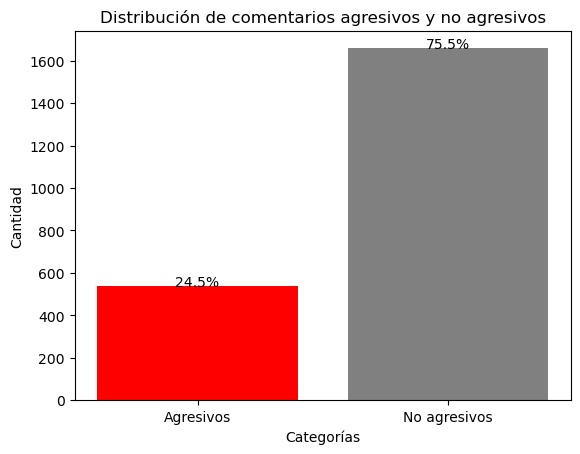

In [7]:
# Gráfica
categories = ['Agresivos', 'No agresivos']
counts = [num_aggressive, num_non_aggressive]
colors = ['red', 'gray']

plt.bar(categories, counts, color=colors)
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Distribución de comentarios agresivos y no agresivos')

total = sum(counts)
percentages = [count/total * 100 for count in counts]
for i, count in enumerate(counts):
    plt.text(i, count+1, f"{percentages[i]:.1f}%", ha='center')

plt.bar(categories[0], counts[0], color='red')
plt.show()

## Conclusión 

El modelo utiliza un preprocesamiento de textos y construye vectores de características basados en unigramas. Luego, utiliza un clasificador SVM lineal para realizar las predicciones de clase.

Al evaluar el modelo en un conjunto de datos de prueba, hemos obtenido una medida de exactitud que nos indica qué tan bien el modelo puede clasificar correctamente los comentarios.

Si bien este trabajo presenta un enfoque inicial para abordar el problema de clasificación de agresividad en comentarios de Twitter en español, existen oportunidades para mejorar el modelo, como explorar otras técnicas de procesamiento de texto, ajustar los parámetros del clasificador y utilizar conjuntos de datos más grandes y diversos.